# Federal Employee Viewpoint Survey Data Exploration Focused on NASA Telework

### Purposes:
#### 1. Save the portion of the data that has to do with NASA employees as a new CSV, reducing the rows from just under 3 million to ~70,000
#### 2. Do some initial data exploration on questions having to do with telework.

by:  Justin Gosses 2016-08-12 justin.c.gosses@nasa.gov

Overview reports & survey results can be downloaded from https://www.fedview.opm.gov


In [8]:
### most of these calls at just bringing in different python modules, eventually down at the bottom of this cell 
### the data is loaded and basic stats created as a check.

# This Python 3 environment 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

#if running locally, run this so seaborn runs the graphs inline:
#sns.plt.show()   # run this one if you want to run every graph as separate window. 
%matplotlib inline

#import pandas, a data processing and CSV file I/O library
import pandas as pd

#also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

#this loads the CSV file and turns it into a pandas data frame.
fevs = pd.read_csv("./evs2015_PRDF_trend.csv") # the iris dataset is now a Pandas DataFrame

# This describe call will take up to 0.5-3 minutes as it is calculating information on almost 3 million entries
fevs.describe()

,year,POSTWT,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,DMINORITY
count,2.990137e+06,2.990137e+06,2.985469e+06,2.974093e+06,2.961708e+06,2.976611e+06,2.960270e+06,2.386044e+06,2.395022e+06,2.398551e+06,...,2.879622e+06,2.880073e+06,778574.000000,2.001101e+06,2.031545e+06,2.026025e+06,2.014367e+06,2.029930e+06,2.030974e+06,2.729168e+06
mean,2.011423e+03,5.195231e+00,3.592359e+00,3.743096e+00,3.525523e+00,3.843604e+00,4.153697e+00,3.977097e+00,4.590352e+00,4.370661e+00,...,3.516520e+00,3.496088e+00,1.820659,1.735006e+00,1.791586e+00,1.824130e+00,1.900565e+00,2.130533e+00,2.141949e+00,1.670462e+00
std,2.999163e+00,1.520194e+01,1.126114e+00,9.828509e-01,1.192067e+00,1.077620e+00,8.948647e-01,9.704139e-01,6.324323e-01,7.149583e-01,...,1.151424e+00,1.109525e+00,1.015688,6.762290e-01,7.068992e-01,6.076360e-01,4.244521e-01,4.221712e-01,4.090882e-01,4.700454e-01
min,2.004000e+03,4.249132e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.010000e+03,1.673878e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,...,3.000000e+00,3.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
50%,2.012000e+03,2.199778e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,...,4.000000e+00,4.000000e+00,1.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,2.014000e+03,4.045545e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,4.000000e+00,4.000000e+00,3.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
max,2.015000e+03,1.475779e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,4.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00


In [9]:
### Makes a dataframe that only has NASA data. 
### This was done by selecting for NN in the agency column.
NASA = fevs.loc[fevs['agency'] == "NN"]
## Using the same describe function as above, some basic stats are generated for the columns that the function can handle.
## It can not calculate all columns.
NASA.describe()

,year,POSTWT,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,DMINORITY
count,70355.000000,70355.000000,70262.000000,70077.000000,69826.000000,70102.000000,69818.000000,56065.000000,56200.000000,56253.000000,...,68515.000000,68472.000000,18796.000000,46171.000000,46057.000000,46086.000000,45789.000000,46076.000000,46095.000000,62914.000000
mean,2011.263663,2.204271,4.041416,4.008562,3.993240,4.077202,4.241342,4.110818,4.694662,4.456100,...,3.789170,3.792178,1.301500,1.481579,1.726209,1.510567,1.850990,1.983288,2.024037,1.754427
std,3.127256,1.265532,0.975056,0.885722,1.044549,0.988083,0.861504,0.900838,0.540276,0.658213,...,1.062196,1.050775,0.794648,0.759591,0.548647,0.521187,0.377188,0.308432,0.289733,0.430430
min,2004.000000,0.672188,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2010.000000,1.617100,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,2012.000000,1.852776,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,...,4.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,2014.000000,2.171173,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2015.000000,22.608714,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000


In [10]:
### exporting the NASA only data into a new CSV
#this will export to the local directory where the Jupyter notebook is running
NASA.to_csv('FEVs_NASA.csv')

## The rest of the Jupyter notebook is data exploration:

### Question 72 is:
Have you been notified whether or not you are eligible to telework?	
   1.)Yes, I was notified that I was eligible to telework.	
   2.)Yes, I was notified that I was not eligible to telework.	
   3.)No, I was not notified of my telework eligibility.	
   4.)Not sure if I was notified of my telework eligibility.
   
if question was left blank, a X is put in the cell. 

In [11]:
### counts the unique answers for question 72
NASA.Q72.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=False)

NaN     51559
 1.0    16038
 4.0     1046
 2.0      895
 3.0      817
Name: Q72, dtype: int64

### Question 73 is:
Please select the response below that BEST describes your current teleworking situation.
   
   1.)I telework	
   2.)I do not telework because I am unable	
   3.)I do not telework because I choose not to
   
if question was left blank, a X is put in the cell.

In [23]:
### counts the unique answers for question 73
NASA.Q73.value_counts(dropna=False)

 1.0    31492
NaN     24184
 3.0     7556
 2.0     7123
Name: Q73, dtype: int64

### A crosstabs plot lets you see how the answers to two questions correlate. 
###### "All" here refers to the total of all answers for that category. Ignore the "ALL" "ALL" box in bottom right if it is confusing.

In [22]:
### Question 72 goes along the y-axis. Question 73 goes along the x-axis. 
### For example, the top left box is the number of respondents that answered #1 for both questions. 
### and the top right box is the number of respondents that answered 1 for question 72 but selected something for 73.
pd.crosstab(NASA.Q72, NASA.Q73, margins=True)

Q73,1.0,2.0,3.0,All
Q72,,,,
1.0,13445,664,1906,16038
2.0,99,690,102,895
3.0,211,409,181,817
4.0,343,298,381,1046
All,31492,7123,7556,70355


* interesting observation from the crosstab figure above is 99 people selected #2 for Q72, saying they have been informed they are ineligiable for telework, but also selected #1 for Q72, saying they teleworked?

* most people fall into the "I have been informed" & "I telework" category, or answer 1 & 1. 

### Question 65 is:
How satisfied are you with the recognition you receive for doing a good job?
   1. Very Dissatisfied
   2. Dissatisfied	
   3. Neither Satisfied nor Dissatisfied	
   4. Satisfied	
   5. Very Satisfied
   
if question was left blank, a X is put in the cell.

### Crosstable of questions 72 and 65 in percents

In [18]:
### Question 72 goes along the y-axis. Question 65 goes along the x-axis. 
### For example, the top left box is the number of respondents that answered #1 for both questions. 
### and the top right box is the number of respondents that answered 1 for question 72 but selected something for 65.
pd.crosstab(NASA.Q72, NASA.Q65, margins=True)

Q65,1.0,2.0,3.0,4.0,5.0,All
Q72,,,,,,
1.0,715,1782,2938,6294,4198,16038
2.0,74,100,202,343,171,895
3.0,107,158,203,252,97,817
4.0,73,130,243,421,168,1046
All,3595,8329,13352,27312,15825,70355


### Crosstable of questions 73 and 65 in counts

In [19]:
### Question 73 goes along the y-axis. Question 65 goes along the x-axis. 
### For example, the top left box is the number of respondents that answered #1 for both questions. 
### and the top right box is the number of respondents that answered 1 for question 73 but selected something for 65.
pd.crosstab(NASA.Q73, NASA.Q65, margins=True)

Q65,1.0,2.0,3.0,4.0,5.0,All
Q73,,,,,,
1.0,1420,3729,6026,12391,7738,31492
2.0,685,1125,1636,2556,1085,7123
3.0,249,629,1351,3226,2046,7556
All,3595,8329,13352,27312,15825,70355


### Crosstable of questions 73 and 65 in percents

In [20]:
pd.crosstab(NASA.Q73, NASA.Q65, margins=True).apply(lambda r: r/r.sum(), axis=1)

Q65,1.0,2.0,3.0,4.0,5.0,All
Q73,,,,,,
1.0,0.022613,0.059383,0.095962,0.197321,0.123224,0.501497
2.0,0.048205,0.079170,0.115130,0.179873,0.076355,0.501267
3.0,0.016537,0.041775,0.089726,0.214253,0.135884,0.501826
All,0.025907,0.060021,0.096218,0.196818,0.114039,0.506997


#### In regards to "Employees given the option to telework will be more positively associated with satisfaction with recognition received for doing a good job than employees not given the option to telework."

It appears that although employees who telework score higher on the 'satisfaction of recognition received' question (65) than those not given the option to telework, the most satisfied, as judged by percent, are those that are given the option to telework but chose not to take it. 


### Crosstable of questions 72 and 65 in percents

In [21]:
pd.crosstab(NASA.Q72, NASA.Q65, margins=True).apply(lambda r: r/r.sum(), axis=1)

Q65,1.0,2.0,3.0,4.0,5.0,All
Q72,,,,,,
1.0,0.022368,0.055748,0.091913,0.196903,0.131331,0.501736
2.0,0.041457,0.056022,0.113165,0.192157,0.095798,0.501401
3.0,0.065483,0.096695,0.124235,0.154223,0.059364,0.500000
4.0,0.035079,0.062470,0.116771,0.202307,0.080730,0.502643
All,0.025907,0.060021,0.096218,0.196818,0.114039,0.506997


In terms of question 72 (whether you were informed about your telework options and what they were) and quesiton 65 (recognition), the only result that stands out is that people who knew  they were not informed of their elegibility for telework scored lowest on the recognition question, (65). 

## Visualizations of Crosstabs using parallel sets

In the two figures below, question 65 (How satisfied are you with the recognition you receive for doing a good job?) is plotted on the X axis

The percent that responded to each answer in question 65 is the y-axis.

Each line represents a response group for question 72 or 73, depending on the plot.

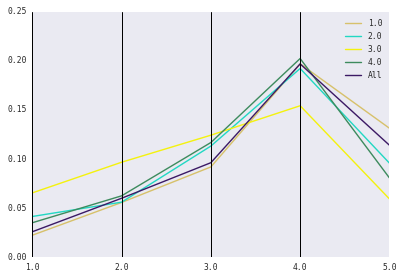

In [47]:
# Parallel comes from the pandas modules 
# coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
Xtab_Per_7265 = pd.crosstab(NASA.Q72, NASA.Q65, margins=True).apply(lambda r: r/r.sum(), axis=1)
Xtab_Per_7265['answers']=["1.0","2.0","3.0","4.0","All"]
###parallel_coordinates(iris.drop("Id", axis=1), "Species")
parallel_coordinates(Xtab_Per_7265.drop("All",axis=1),"answers")


Each line = a response group for question 72

Yellow line = Answer 3.)No, I was not notified of my telework eligibility.

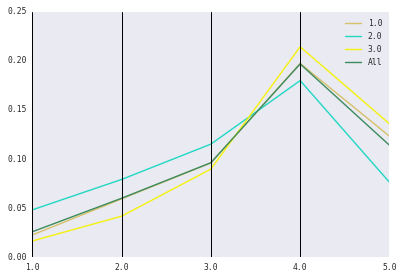

In [50]:
Xtab_Per_7365 = pd.crosstab(NASA.Q73, NASA.Q65, margins=True).apply(lambda r: r/r.sum(), axis=1)
Xtab_Per_7365['answers']=["1.0","2.0","3.0","All"]
###parallel_coordinates(iris.drop("Id", axis=1), "Species")
parallel_coordinates(Xtab_Per_7365.drop("All",axis=1),"answers")



Each line = a response group for question 73

Yellow line = Answer 3.)I do not telework because I choose not to

## Review of question definitions

### Question 72 is:
Have you been notified whether or not you are eligible to telework?	
   1.)Yes, I was notified that I was eligible to telework.	
   2.)Yes, I was notified that I was not eligible to telework.	
   3.)No, I was not notified of my telework eligibility.	
   4.)Not sure if I was notified of my telework eligibility.
   
if question was left blank, a X is put in the cell. 

### Question 65 is:
How satisfied are you with the recognition you receive for doing a good job?
   1. Very Dissatisfied
   2. Dissatisfied	
   3. Neither Satisfied nor Dissatisfied	
   4. Satisfied	
   5. Very Satisfied
   
if question was left blank, a X is put in the cell.

### Question 73 is:
Please select the response below that BEST describes your current teleworking situation.
   
   1.)I telework	
   2.)I do not telework because I am unable	
   3.)I do not telework because I choose not to
   
if question was left blank, a X is put in the cell.

## Next Figure = Heatmap, using the seaborn library
##### Darker colors corrlate more higher. 
##### There is a 1:1 line that goes down the center that effectively compares the responses of one question to itself. 
#### Note: this isn't something to use to make conclusions but rather a quick test to see if it might be useful for  directing further investigation. 

### For telework purposes, probably not useful.

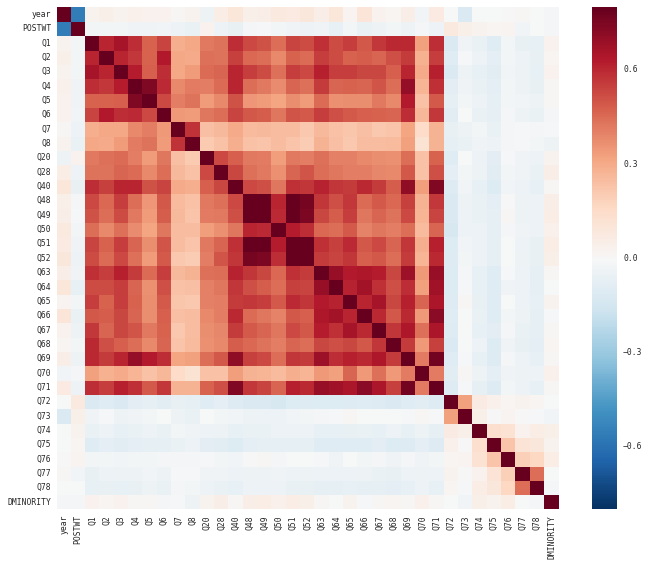

In [28]:
# seaborn library = sns

sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
corrmat = NASA.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

The shift from blue to red around the question 71/72 boundary is most likely related to a shift in the number of possible answers. 